### 关联规则分析
一、数据预处理
   1. 按年度进行划分，同一公司同一年度的所有已购产品作为其项集
      - 数据共74006条
          - START_DATE和END_DATE为0000-00-00的为12071+3678条
          - 无法转化为datetime
      - START_DATE和END_DATE为空值的有15408条
          - NaN为float类型，不是strptime()所需的str类型

In [275]:
'''
#数据预处理，删除‘自用、试用’订单，删除‘小微’，清洗公司名称
data = pd.read_csv('../data/association_rule_data/dwf_cloud_orderdetail_new_with_order_no.csv') # 74006
data['CATEGORY_SUB'].unique()
data['if'] = data['CATEGORY_SUB'].apply(lambda x: 1 if x in ['其他', '低折扣', '普通', '备货'] else 0)
data2 = data[data['if']==1]
data2.drop(columns=['if'],inplace=True)
cloud_data = ['U8cloud云模式','NC Cloud公有云','NC Cloud软件模式','U8 Cloud软件模式']
data2['PROD_LINE'].apply(lambda x: x not in cloud_data)
data2 = data2[data2['PROD_LINE'].apply(lambda x: x not in cloud_data)]
#import re
#pattern = '[a-zA-Z]+.*$'
#data.loc[data['CUSTOMER_NAME'].apply(lambda x: False if re.match(pattern,x) else True),:]
#data.loc[data['CUSTOMER_NAME'].apply(lambda x: True if re.match(pattern,x) else False),:]['CUSTOMER_NAME'].unique()[:500]
CUSTOMER_startswith_numberLetter = [
       '0000010090', '000001910', '000001_K535', '000004_P833',
       '000_Z582', '00119pro电商通生产', '001_W551', '001正源', '002188inte营销版',
       '002_U579', '00333_1', '003正源食品', '00400', '0078wN59的企业', '009_4',
       '010瑞之有自用', '01_A647', '01_Q868', '03258', '0376wbJe的企业',
       '05454d02的企业', '0574pjTb的企业', '0648avl3的企业', '0705直接购买1',
       '0799体验账套', '0802sDYW的企业', '0829-dev-12-2-181', '0904-dev-临时',
       '0905Qaxk的企业', '0sH5hAxU的企业', '101新正源', '1040112171', '106补丁包工序_3',
       '111091710', '111111111111112', '1111112222211111', '111144444',
       '11123421', '111GB', '111_B845', '111_F12', '111_F914',
       '112333233', '1126566', '112lq', '113312123', '11KK1', '11_C709',
       '11_J847', '11_S927', '11_X75', '1201合并流程不启用序列号', '121213232',
       '1213001_2', '121_E557', '1222沙箱回调失败', '1223_5', '12306160806',
       '12345652115', '123456航天信息', '123nx', '123_N876', '123_N91',
       '123_T359', '123_T457', '123_W652', '1243231', '128142606',
       '12_A918', '12啊实打实', '13038664606', '130STDGOLD_N983',
       '130台式20200825', '13116', '131279115561FMWJTQA的公司',
       '13181662009的企业', '13222971806的企业', '13239314364的企业',
       '13285568641_OCzL的企业', '13303722500的企业', '133497kU的企业',
       '13388190508的企业', '133chuanc', '13516823409的企业', '1354',
       '13551283671的企业', '13608885119的企业', '13662336410_U5T9的企业',
       '13689011214的企业', '13691118570的企业', '13698758338',
       '13716199578的企业', '13757776530的企业', '13780301024XiB的公司',
       '13854688635的企业', '13864875669的企业', '13870637889的企业',
       '13932679017', '13956377149的企业', '13972006258的企业', '13单独12但是v',
       '1432', '1456789555', '1499410989803d', '15009671010的企业', '15072',
       '150916', '150lvlv', '150_3', '15133005901的企业', '1518kjv7的企业',
       '15205105986的企业', '15343517874的企业', '15346DiV的企业', '1563345',
       '159034289451FMVFDK4的公司', '159779122601FMTSGRV的公司', '1613t5cF的企业',
       '1667GSjZ的企业', '17606988872的企业', '17天津公司总账', '18369175727的企业',
       '18520647647的企业', '18600253714的企业', '18608772840的企业',
       '18612206382的企业', '18622企业1554878967', '18637394632的企业',
       '18648940144的企业', '18766738435的企业', '18816239266的企业',
       '18997218797的企业', '18天津公司总账', '191204', '1956CoMC的企业', '19年新账套',
       '1_G638', '1_J662', '1_K428', '1_M943', '1_O855', '1_U604',
       '1_V689', '1义乌市洪达医疗器械有限公司', '200630maj', '2007制度_1', '2008Rcxx的企业',
       '20132018_3', '2016年000006账套', '2017年玉吉洗涤有限公司4231', '201807陕西办王欢',
       '20181227', '2018年账套_1', '201909天津自贸试验区吉金惠民国际贸易有限公司', '2019108',
       '20191128石家庄慷达商贸有限公司', '201912包头市井文汽修有限公司', '2019慧玲养殖基地',
       '2019柔洁商贸公司_2', '2019滨海体育公园（新）', '2019研拓', '2019郑州福广玩具商行',
       '2019长大电器', '2019阿那亚物业', '2020-10汉邦工具', '20200113', '2020051901',
       '2020052601', '2020060501prod', '20200701_1', '202008上海柏政商贸有限公司',
       '20200915WZH01', '20200918某某电子', '20200921', '20201027晚上跑题',
       '2020年06月', '2020马连升账套', '212212221', '2126L3LT的企业', '220新建',
       '221inte-20191231', '22212321321', '2222288889', '23568445qwer',
       '2356S1uU的企业', '25914dAx的企业', '266补丁', '27654', '2822包', '2893包',
       '2929vI3o的企业', '2_E153', '300058上海折影摄影有限公司', '300099—内蒙古1911起仓库',
       '300白城小额贷款', '31510202', '33331_1', '3333311', '3979qBje的企业',
       '3988lSnP的企业', '4003xsEs的企业', '4165qfKu的企业', '4302vQOB的企业',
       '4444DDDDsb9', '4534uy4r6756788', '4582BC3O的企业', '4738HgJr的企业',
       '507看板发布1', '5138pnTn的企业', '520-7', '520sunyingjian',
       '5382MsPH的企业', '5669YfqL的企业', '5677P3ua的企业', '58282dDS的企业',
       '60009788372_QDi2的企业', '60012215210_x939的企业',
       '60012819849_3pIs的企业', '60012868790的企业', '60012891572的企业',
       '6139SwYh的企业', '6196kCT5的企业',
       '61号补丁新建账套1777带友空间序列号存货调整200429_I446',
       '6PL International Logistic (Guangzhou) Limited Company',
       '7000011', '700008', '7203kzfe的企业', '7409VAH9的企业', '773073222的公司',
       '7896cunjiti', '7967wC8H的企业', '7月11培训', '800001_4', '800007云主机账套',
       '813先开通工作圈再升级友空间', '8146F2WI的企业', '8249NSCm的企业', '8385lbCC的企业',
       '8751v2fc的企业', '8787987899', '888_E212', '888_U670', '888_Y915',
       '895632456', '8998khK3的企业', '9-22', '90014160504', '929欠条',
       '9516852', '9536jYHs的企业', '9999999999000', '99999ooooooooooo',
       '999da', '9_B997', '9_K636', '？', '？重庆蓝黛动力传动机械股份有限公司'
       'A111母婴公司', 'a22231', 'AAbzsss', 'AA_T577', 'aa商贸营销有限公司',
       'AQ七夕的工程项目','A_N845',
       'A单帐','A母婴公司', 'A母婴公司_7', 'A母婴公司_Q893',
       'AIMOLIKJ', 'akf','aserty',
       'beibayonghu','BJCYYYYXGS',
       'BJCYYYYXGS', 'bjrp',
       'c20190101','ce-A6',
       'ces2221', 'ceshi111_1', 'ceshi12345tizi', 'ceshi1789', 'ceshi456',
       'ceshizixin', 'ceshi_E561','CS1', 'CS1112222', 'cs1199', 'cs123121',
       'cs12354202', 'cs26145525', 'CS6768', 'cs_K746',
       'CCSE155427902360004249716',
       'CCSE155461635260010947334', 'CCSE155464583260007121799',
       'CCSE155471505460009953514', 'CCSE158503048060010007054',
       'CCSE158587761660009816928', 'CCSE158634959260009753027',
       'CCSE158634966960009753027', 'CCSE158643274060004506117',
       'CCSE158693154760007647073','CM201030',
       'DD2222222222222222', 'dd989',
       'demo1115', 'demo_A957', 'denise2016',
       'DSF1', 'DSR（银川）_1','F666', 'F6666', 'fhhhhh',
       'FSK_1', 'FTD_1',
       'G22', 'genius', 'gf111',
       'gongzuoquaneeeee', 'gx0000000001',
       'GY2019', 'H6-28-7-28',
       'HBSS',
       'heyishun', 'hgjg_1', 'HHHHHHHHHH',
       'HTD',
       'isv1228沙箱',
       'jialijia', 'jntest1223',
       'jntest1224-1', 'jntest1224-2', 'jntest1226回调',
       'jtngm', 'LCL6654654654', 'ldhysh001',
       'local_stock', 'lyh123', 'lyzw',
       'lztt2020', 'M2020', 'MOUMOU',  'm？x？p？r',
       'ns好会计8', 'ntbrd',
       'nyhtsm', 'pezydn',
       'q4ubh01s8l', 'qdkx', 'RITE auto', 'rtyuio',
       's6mxk7fd9i', 'Sa789',
       'SADSADASDDAS', 'sasa0000001',
       'shenme', 'sh贸易', 'smbjpb', 'SXXR', 'T+cloud普及版备货3', 'T+财务体验',
       't-123', 'T3涵坤妙丰', 'taikennglebataikennglebataiken',
       'tcloud018的企业', 'TC新商贸行业流程题_1',
       'TC新生产谢清海',
       'TEST111111111111111111111111111111', 'test1223',
       'test12323111111', 'Test150037', 'Test150042_1', 'test171',
       'Test20200326', 'test20200418', 'test222111', 'test27133743',
       'test2_Q863', 'TEST88888888', 'test999999', 'testlingshou123',
       'test_C52', 'test_P122', 'Test删除固定资产', 'test批发零售', 'test风火',
       'TEST食品', 'TEXTzhj',  'too服装鞋帽',
       'T软件', 'uisd91bypw',
       'vc_内测账套_合并流程销售发票立账', 'vulcan', 'VWZDHUtE的企业', 'wbb',
       'wdw跑店管理2', 
       'ww_I536',  'wzx18233736', 'XAHMXX的公司',
       'XAN-N', 'XBS', 'XINDAYIN', 'xinhuiqu', 'xintaihuanbao', 'xq7',
       'ycimedia_1', 'YDYK', 'yhb的公司', 'ylcs',
       'yo23233', 
       'zhiren-T1', 'zjcyrj的公司', 'Z品汇','一个月后删除', '一体化_A665', '一体化_X658','一般会计']
CUSTOMER_not_ignore = [
       '001正源','003正源食品','1义乌市洪达医疗器械有限公司', '2017年玉吉洗涤有限公司4231',
       '201909天津自贸试验区吉金惠民国际贸易有限公司','20191128石家庄慷达商贸有限公司', 
       '201912包头市井文汽修有限公司', '2019慧玲养殖基地',
       '2019柔洁商贸公司_2', '2019滨海体育公园（新）', '2019研拓', '2019郑州福广玩具商行',
       '2019长大电器', '2019阿那亚物业', '2020-10汉邦工具','202008上海柏政商贸有限公司',
       '300058上海折影摄影有限公司', '300099—内蒙古1911起仓库','？重庆蓝黛动力传动机械股份有限公司',
       'Africa Bauxite Mining Company Ltd', 'Aice Group Holdings Pte Ltd',
       'Alliance Steel (M) Sdn Bhd',
       'Alliance Steel(M) Sdn Bhd.',
       'ArkenstoneCollaboration',
       'Asia Pacific Aviation  Leasing Ltd 亚太航空租赁集团',
       'AsiaPolyurethaneMfgPteLtd', 'A丰华商贸有限',
      ]
CUSTOMER_ignore = [item for item in CUSTOMER_startswith_numberLetter if item not in CUSTOMER_not_ignore] # if和for的顺序
customer_save2 = data2['CUSTOMER_NAME'].apply(lambda x: x not in CUSTOMER_ignore)
text2 = data2.loc[customer_save2,:].copy()
text2 = text2[text2['PROD_LINE']!='小微']
text3 = text2.drop(columns = ['if'])
text3.to_csv('../data/association_rule_data/dwf_processed_with_order_no.csv', index=False)
'''


In [ ]:
'''
# 0000-00-00无法转化为datetime，共15799条
data[(data['END_DATE'] == '0000-00-00') | (data['START_DATE'] == '0000-00-00')] # 起始或截止日期为0000-00-00，在Series中用 | 表示或，or需要truth value在Series中意义是模糊的
data[data['START_DATE'].apply(lambda x:type(x)) == float]  # strptime() argument 1 must be str, not float
data['START_DATE'] = data['START_DATE'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
data['END_DATE'] = data['END_DATE'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
data['time_delta'] = data['END_DATE'] - data['START_DATE']
data['time_delta_days'] = data['time_delta'].apply(lambda x: x.days)
a = data['time_delta_days'].unique()
a.sort()
data_1 = data[(data['START_DATE'] != '0000-00-00') & (data['END_DATE'] != '0000-00-00')].copy()
data_1.dropna(inplace=True)
'''

(array([1.195e+03, 1.200e+01, 6.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([1.0000e+00, 2.1740e+02, 4.3380e+02, 6.5020e+02, 8.6660e+02,
        1.0830e+03, 1.2994e+03, 1.5158e+03, 1.7322e+03, 1.9486e+03,
        2.1650e+03]),
 <BarContainer object of 10 artists>)

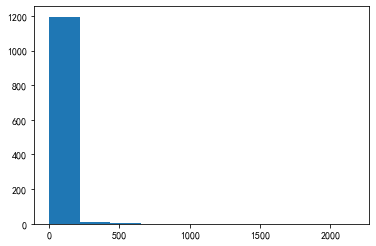

In [137]:
'''
#各公司所购买产品线数量 直方图展示
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
text.groupby('CUSTOMER_NAME').agg({'PROD_NAME':'count'})#.sort_values(by='PROD_NAME')
#d = text.groupby('CUSTOMER_NAME').agg({'PROD_NAME':'count'}).values
d = text.groupby('PROD_NAME').agg({'CUSTOMER_NAME':'count'}).values
plt.hist(d)
'''

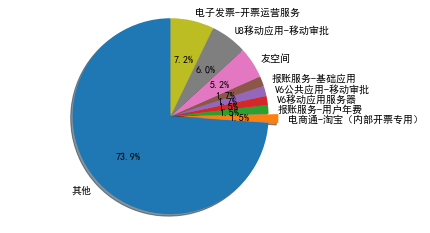

In [208]:
'''
# 同一列进行agg导致multiindex的问题，agg的字典参数中，再利用字典形式
a = data.groupby('PROD_NAME').agg({'CUSTOMER_NAME':['nunique','count']})
#a.columns = a.columns.droplevel(0) #删除顶层索引
a[:10]
a.sort_values(by='count',ascending=False,inplace=True)
a[8:]['nunique'].sum()
b = a[:8].copy()
c = pd.Series(a[8:].sum(),index=['其他'])
b = b.append(c)
labels = b.index.values[::-1]#'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = b.values[::-1]#[15, 30, 45, 10]
explode = [0,0.1,0,0,0,0,0,0,0]#(0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('Demo_official1.jpg', dpi=300)
plt.show()
'''

### 数据分析

In [15]:
import pandas as pd
import numpy as np
from datetime import datetime

In [285]:
data = pd.read_csv('../data/association_rule_data/dwf_processed_with_order_no.csv')# 46909？

In [286]:
data

,CUSTOMER_NAME,CATEGORY_SUB,CLOUD_TYPE,PROD_LINE,PROD_NAME,ORDER_NO,TENANT_ID,SELLMONEY,DISTRICT_NAME,PAY_DATE,ORG_NAME,SALE_ORG,ACTIVE_STATUS,DISTRICT_NAME.1,if
0,山东神驰化工集团有限公司,低折扣,公有云,NC移动应用,NCV6移动租赁-实施服务费,XK020878,NaN,300000.0,山东区,2019-09-19,潍坊分公司,潍坊分公司,N,山东区,1
1,山东神驰化工集团有限公司,低折扣,公有云,NC移动应用,V6公共应用-移动审批,XK020878,NaN,7200.0,山东区,2019-09-19,潍坊分公司,潍坊分公司,Y,山东区,1
2,山东神驰化工集团有限公司,低折扣,公有云,NC移动应用,V6公共应用-移动审批,XK050677,gd8vz4yu,4249.0,山东区,2020-10-13,潍坊分公司,潍坊分公司,Y,山东区,1
3,山东神驰化工集团有限公司,低折扣,公有云,NC移动应用,V6移动应用服务器,XK050677,gd8vz4yu,2951.0,山东区,2020-10-13,潍坊分公司,潍坊分公司,Y,山东区,1
4,山东神驰化工集团有限公司,低折扣,公有云,友云采,友云采-供应商关系管理 SRM-供应商管理,XK020876,r0uzhyb7,62484.0,山东区,2019-09-19,潍坊分公司,潍坊分公司,Y,山东区,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30251,龙建路桥股份有限公司,低折扣,公有云,友空间,友空间-公文管理,XK024961,kytq233a,2000.0,东北区,2019-12-02,黑龙江分公司,黑龙江分公司,Y,东北区,1
30252,龙蟒佰利联集团股份有限公司,低折扣,公有云,友云音,友云音,XK013293,qlWjSBzqVN6444041762,20000.0,西北区,2019-07-09,河南分公司,河南分公司,Y,西北区,1
30253,龙阔达(北京)展览展示有限公司,普通,公有云,电子发票,电子发票-开票运营服务,XK043408,NaN,0.0,北京区,2020-06-16,北京分公司,北京方圆和信息技术有限公司,N,北京区,1
30254,？重庆蓝黛动力传动机械股份有限公司,低折扣,公有云,U8移动应用,U8移动应用-移动审批,XK010701,242316,960.0,西南区,2019-05-16,重庆分公司,重庆友捷科技有限公司,Y,西南区,1


In [307]:
customer_num = len(data['CUSTOMER_NAME'].unique())#8453
order_num = len(data['ORDER_NO'].unique()) #订单数量 13971
prod_line_num = len(data['PROD_LINE'].unique())#86
prod_name_num = len(data['PROD_NAME'].unique())#1216

In [368]:
# 基础数据分析
basic_analysis = pd.DataFrame({'数量':{'公司':customer_num,'订单':order_num,'产品线':prod_line_num,'产品模块':prod_name_num}})
basic_analysis.reset_index(inplace=True)

In [370]:
# 产品线分析
prod_line_analysis = data.groupby('PROD_LINE').agg({'ORDER_NO':'nunique','CUSTOMER_NAME':'nunique','PROD_NAME':'nunique'}).sort_values(by='ORDER_NO',ascending=False)# 订单数（订单去重）
prod_line_analysis.reset_index(inplace=True)
prod_line_analysis.columns=['INDEX_PROD_LINE','ORDER NUM','CUSTOMER NUM','PROD MODULE NUM']

In [372]:
# 产品模块分析
prod_name_analysis = data.groupby('PROD_NAME').agg({'ORDER_NO':'nunique','CUSTOMER_NAME':'nunique'}).sort_values(by='ORDER_NO',ascending=False)# 订单数（订单去重）
prod_name_analysis.reset_index(inplace=True)
prod_name_analysis.columns=['INDEX_PROD_NAME','ORDER NUM','CUSTOMER NUM']

In [405]:
# 公司分析
# multindex用tuple表示各层索引
customer_analysis = data.groupby('CUSTOMER_NAME').agg({'ORDER_NO':'nunique','PROD_LINE':['nunique','unique'],'PROD_NAME':'nunique'}).sort_values(by=('PROD_LINE','nunique'),ascending=False)# 订单数（订单去重）
customer_analysis.reset_index(inplace=True)
customer_analysis.columns = customer_analysis.columns.droplevel(0) #删除顶层索引
customer_analysis.columns=['INDEX_CUSTOMER','ORDER NUM','PROD LINE NUM','PROD LINE BOUGHT','PROD MODULE NUM']
customer_analysis[['PROD LINE BOUGHT','PROD MODULE NUM']] = customer_analysis[['PROD MODULE NUM','PROD LINE BOUGHT']] # 公司的所有订单中包含的产品
customer_analysis.columns=['INDEX_CUSTOMER','ORDER NUM','PROD LINE NUM','PROD MODULE NUM','PROD LINE BOUGHT']

In [407]:
'''
# 写入同一个excel的不同sheet中
with pd.ExcelWriter('result_data_analysis.xlsx') as writer:
    basic_analysis.to_excel(writer, sheet_name='基础数据分析',index=False) 
    prod_line_analysis.to_excel(writer, sheet_name='产品线分析',index=False)
    prod_name_analysis.to_excel(writer, sheet_name='产品模块分析',index=False)
    customer_analysis.to_excel(writer, sheet_name='客户分析',index=False)
'''

In [391]:
'''
from itertools import combinations # , permutations
# 组合数
prod_line_per_cust['prod_line_perm_2'] = prod_line_per_cust['PROD_LINE'].apply(lambda x:[i for i in combinations(x, 2)])
'''

### Apriori算法

#### 产品模块分析 product name

In [408]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
#from mlxtend.frequent_patterns import association_rules


text = data.copy()
module = text['PROD_NAME'].unique()
module

#text = test[test['MODULENAME'].isin(['成本管理'])]

#设定字典
module_dict = {}
for i in text.index:
    if text.loc[i,'CUSTOMER_NAME'] not in module_dict.keys():
        module_dict[text.loc[i,'CUSTOMER_NAME']]=[text.loc[i,'PROD_NAME']]
    else:
        if text.loc[i,'PROD_NAME'] not in module_dict[text.loc[i,'CUSTOMER_NAME']]:
            module_dict[text.loc[i,'CUSTOMER_NAME']].append(text.loc[i,'PROD_NAME'])

data1 = []
for values in module_dict.values():
    data1.append(values)

#设置数据集
te = TransactionEncoder()
#进行 one-hot 编码
te_ary = te.fit(data1).transform(data1)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [411]:
len(data1)

8453

In [412]:
#利用 Apriori 找出频繁项集
freq = apriori(df, min_support=0.02, use_colnames=True)
#降序输出支持度
freq.sort_values(by = 'support',ascending = False, inplace=True)
#计算置信度
#result = association_rules(freq, metric="confidence", min_threshold=0.1)
#result.sort_values(by='confidence',ascending=False,axis=1)

#结果验证
box = pd.DataFrame(freq)
box_list = box['itemsets'].tolist()


mod_list = list(map(frozenset,data1))
    
count_dict={}
for i in range(0,len(box_list)):
    item = box_list[i]
    num = mod_list.count(item)
    if item not in count_dict.keys():
        count_dict[item] = num/len(mod_list)
    else:
        continue
df_sort=pd.DataFrame(sorted(count_dict.items(), key = lambda kv:(kv[1], kv[0]),reverse=True),
                     columns=['产品组合','覆盖率'])
#降序输出覆盖率
df_sort.sort_values('覆盖率',ascending = False)
df_sort.sort_values('覆盖率').sum()

覆盖率    0.441382
dtype: float64

In [435]:
freq.sort_values(by = 'support',ascending = False, inplace=True)
freq['num'] = round(freq['support']*len(data1),0).astype('int')

In [436]:
support_and_coverage = pd.merge(freq, df_sort, how='outer', left_on='itemsets', right_on='产品组合')
support_and_coverage.drop(columns=['itemsets'], inplace=True)
support_and_coverage.rename(columns={'support':'支持度','num':'客户数量'},inplace=True)
support_and_coverage = support_and_coverage[['产品组合','支持度','覆盖率','客户数量']]
# 将frozenset转换为list，再合并为str，使得excel中的显示易读
support_and_coverage['产品组合'] = support_and_coverage['产品组合'].apply(lambda x: '，'.join(list(x)))

In [437]:
result = association_rules(freq, metric="confidence", min_threshold=0.01)
#result['antecedents'] = result['antecedents'].apply(lambda x: '，'.join(list(x)))
#result['consequents'] = result['consequents'].apply(lambda x: '，'.join(list(x)))

In [438]:
'''
with pd.ExcelWriter('result_without_cloud_apriori_product_name.xlsx') as writer:
    support_and_coverage.to_excel(writer, sheet_name='频繁项集的支持度和覆盖率',index=False)
    result.to_excel(writer, sheet_name='频繁项集各项间的关联效果',index=False)
'''

In [106]:
'''
# 关联结果图形展示
from graphviz import Digraph
from tqdm.auto import tqdm
dot = Digraph()  # 创建有向图
graph_data = result[['antecedents', 'consequents', 'lift']]   # 切分画图用的前项、后项和实例数数据
for each_data in tqdm(graph_data.values):  # 循环读出每条规则
    node1, node2, weight = each_data  # 分割每条数据画图用的前项、后项和实例数
    node1 = str(node1).strip('frozenset({})')  # 转化为字符串
    node2 = str(node2).strip('frozenset({})')  # 转化为字符串
    label = '%s' % weight  # 创建一个标签用于展示实例数
    dot.node(node1, node1, shape='record')  # 增加节点（规则中的前项）
    dot.edge(node1, node2, label=label, constraint='true')  # 增加有向边
dot.render('apriori_without_cloud_product_name', view=True)  # 保存规则为pdf文件
'''

'apriori_without_cloud_product_name.pdf'

#### 产品线分析 product line

In [429]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
#from mlxtend.frequent_patterns import association_rules


text1 = data.copy()
module1 = text1['PROD_LINE'].unique()

#text = test[test['MODULENAME'].isin(['成本管理'])]

#设定字典
module_dict1 = {}
for i in text1.index:
    if text1.loc[i,'CUSTOMER_NAME'] not in module_dict1.keys():
        module_dict1[text1.loc[i,'CUSTOMER_NAME']]=[text1.loc[i,'PROD_LINE']]
    else:
        if text1.loc[i,'PROD_LINE'] not in module_dict1[text1.loc[i,'CUSTOMER_NAME']]:
            module_dict1[text1.loc[i,'CUSTOMER_NAME']].append(text1.loc[i,'PROD_LINE'])

data11 = []
for values in module_dict1.values():
    data11.append(values)

#设置数据集
te1 = TransactionEncoder()
#进行 one-hot 编码
te_ary1 = te1.fit(data11).transform(data11)
df1 = pd.DataFrame(te_ary1, columns=te1.columns_)

In [430]:
#利用 Apriori 找出频繁项集
freq1 = apriori(df1, min_support=0.01, use_colnames=True)
#降序输出支持度
freq1.sort_values(by = 'support',ascending = False, inplace=True)

#计算置信度
result1 = association_rules(freq1, metric="confidence", min_threshold=0.01)
#result.sort_values(by='confidence',ascending=False,axis=1)

#结果验证
box1 = pd.DataFrame(freq1)
box_list1 = box1['itemsets'].tolist()


mod_list1 = list(map(frozenset,data11))
    
count_dict1={}
for i in range(0,len(box_list1)):
    item = box_list1[i]
    num = mod_list1.count(item)
    if item not in count_dict1.keys():
        count_dict1[item] = num/len(mod_list1)
    else:
        continue
df_sort1=pd.DataFrame(sorted(count_dict1.items(), key = lambda kv:(kv[1], kv[0]),reverse=True),
                     columns=['产品组合','覆盖率'])
'''
#降序输出覆盖率
df_sort1.sort_values('覆盖率',ascending = False)
df_sort1.sort_values('覆盖率').sum()
'''

"\n#降序输出覆盖率\ndf_sort1.sort_values('覆盖率',ascending = False)\ndf_sort1.sort_values('覆盖率').sum()\n"

In [431]:
freq1['num'] = round(freq1['support']*len(data1),0).astype('int')

In [439]:
support_and_coverage1 = pd.merge(freq1, df_sort1, how='outer', left_on='itemsets', right_on='产品组合')
support_and_coverage1.drop(columns=['itemsets'], inplace=True)
support_and_coverage1.rename(columns={'support':'支持度','num':'客户数量'},inplace=True)
support_and_coverage1 = support_and_coverage1[['产品组合','支持度','覆盖率','客户数量']]
# 将frozenset转换为list，再合并为str，使得excel中的显示易读
support_and_coverage1['产品组合'] = support_and_coverage1['产品组合'].apply(lambda x: '，'.join(list(x)))

In [440]:
result1 = association_rules(freq1, metric="confidence", min_threshold=0.0001)
#result1['antecedents'] = result1['antecedents'].apply(lambda x: '，'.join(list(x)))
#result1['consequents'] = result1['consequents'].apply(lambda x: '，'.join(list(x)))

In [36]:
'''
# 关联结果图形展示
from graphviz import Digraph
dot1 = Digraph()  # 创建有向图
graph_data1 = result1[['antecedents', 'consequents', 'lift']]   # 切分画图用的前项、后项和实例数数据
for each_data in graph_data1.values:  # 循环读出每条规则
    node1, node2, weight = each_data  # 分割每条数据画图用的前项、后项和实例数
    node1 = str(node1).strip('frozenset({})')  # 转化为字符串
    node2 = str(node2).strip('frozenset({})')  # 转化为字符串
    label = '%s' % weight  # 创建一个标签用于展示实例数
    dot1.node(node1, node1, shape='record')  # 增加节点（规则中的前项）
    dot1.edge(node1, node2, label=label, constraint='true')  # 增加有向边
dot1.render('apriori_without_cloud_product_line', view=True)  # 保存规则为pdf文件
'''

'apriori_without_cloud_product_line.pdf'

In [442]:
'''
with pd.ExcelWriter('result_without_cloud_apriori_product_line.xlsx') as writer:
    support_and_coverage1.to_excel(writer, sheet_name='频繁项集的支持度和覆盖率',index=False)
    result1.to_excel(writer, sheet_name='频繁项集各项间的关联效果',index=False)
'''